# 데이터 확인용 파일
* 리뷰 300만
* 맥주 110369 개
* 유저 약 3만
  * 그중 약 1만명이 1개만 리뷰씀
  * 리뷰 5개 이하인 사람은 약 2만명
  * 그니까 리뷰가 5개 초과인 사람은 1만명정도

In [1]:
import pandas as pd

with open('C:/Users/SSAFY/Downloads/SNAP-Ratebeer.txt', encoding="cp1252") as file:
    lines = file.readlines()

In [2]:
# 데이터 추출 및 전처리
data = []
current_beer = {}
for line in lines:
    if line.strip():  # 빈 줄이 아닌 경우
        key, value = line.strip().split(':', 1)  # 첫번째 ':'만 스플릿에 이용함, 왜냐면 :를 쓴 글이 있음;
        current_beer[key] = value
    else:  # 빈 줄인 경우 현재 맥주 정보를 데이터에 추가하고 초기화
        data.append(current_beer)
        current_beer = {}

# 마지막 맥주 정보를 추가
if current_beer:
    data.append(current_beer)

# 데이터프레임으로 변환
df = pd.DataFrame(data)

In [3]:
# beer_df = df[['beer/name', 'beer/beerId', 'beer/brewerId', 'beer/ABV', 'beer/style']].drop_duplicates()
beer_df = df[['beer/name', 'beer/beerId', 'beer/brewerId', 'beer/ABV', 'beer/style']]
beer_df['count'] = beer_df.groupby(['beer/beerId'])['beer/beerId'].transform('count')
beer_df.drop_duplicates(['beer/beerId'], inplace=True)
beer_df.reset_index(drop=True)

beer_df

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_20820\1007964011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer_df['count'] = beer_df.groupby(['beer/beerId'])['beer/beerId'].transform('count')
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_20820\1007964011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer_df.drop_duplicates(['beer/beerId'], inplace=True)


,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,count
0,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,2
2,John Harvards Cristal Pilsner,71716,8481,5,Bohemian Pilsener,1
3,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Kölsch,2
5,John Harvards Vanilla Black Velvet Stout,31544,8481,-,Sweet Stout,1
6,John Harvards American Brown Ale,71714,8481,-,Brown Ale,1
...,...,...,...,...,...,...
2924147,Oakhill Merry Maltings,31035,1028,4.8,Premium Bitter/ESB,1
2924148,Oakhill Best Bitter,5672,1028,4,Bitter,2
2924150,Oakhill Black Magic Stout,5675,1028,4.5,Dry Stout,4
2924154,Oakhill Mendip Twister,12240,1028,6.3,Stout,5


In [4]:
beer_df.loc[beer_df['beer/ABV']  == ' -','beer/ABV'] = '0'
beer_df['beer/ABV'] = beer_df['beer/ABV'].astype(float)

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_20820\2494058164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer_df['beer/ABV'] = beer_df['beer/ABV'].astype(float)


## 알콜도수 시각화

[28824 20409 10493  7971  6816  4433  2903  1533  1275   864   447   263
   252   229   207   137    70    51    28    19]


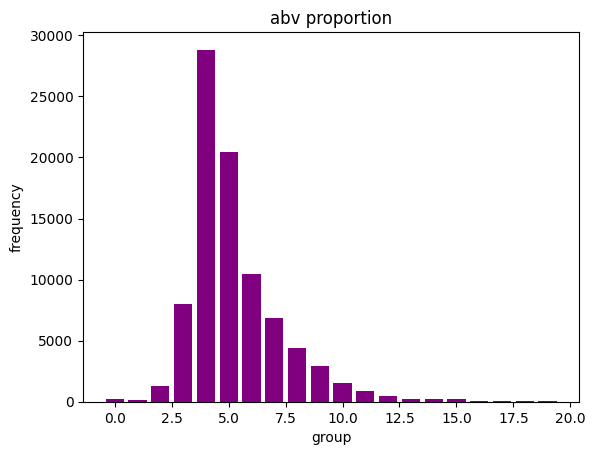

In [5]:
import matplotlib.pyplot as plt

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

new = pd.cut(beer_df['beer/ABV'], bins=bins, labels=label)
group_counts = new.value_counts()
print(group_counts.values)

plt.bar(group_counts.index, group_counts.values, color='purple')
plt.xlabel('group')
plt.ylabel('frequency')
plt.title('abv proportion')
plt.show()

## 맥주 당 달린 리뷰 개수 시각화

[108902    886    326    119     69     28     20     12      5      2]


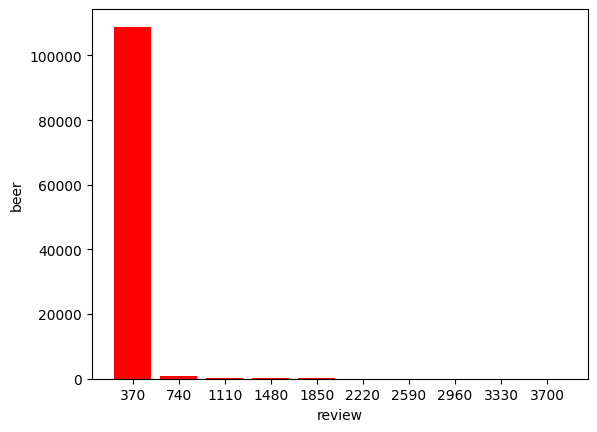

In [34]:
label = ['370', '740', '1110', '1480', '1850', '2220', '2590', '2960', '3330', '3700']  # 대충 370개씩 끊김

new = pd.cut(beer_df['count'], 10, labels=label)
group_counts = new.value_counts()
print(group_counts.values)
# print(type(group_counts.index))

plt.bar(group_counts.index[:], group_counts.values[:], color='red')
plt.xlabel('review')
plt.ylabel('beer')
plt.show()

In [28]:
filtered_df = beer_df[beer_df['count'] <= 370]
filtered_df.reset_index(drop=True)

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,count
0,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,2
1,John Harvards Cristal Pilsner,71716,8481,5.0,Bohemian Pilsener,1
2,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Kölsch,2
3,John Harvards Vanilla Black Velvet Stout,31544,8481,0.0,Sweet Stout,1
4,John Harvards American Brown Ale,71714,8481,0.0,Brown Ale,1
...,...,...,...,...,...,...
108897,Oakhill Merry Maltings,31035,1028,4.8,Premium Bitter/ESB,1
108898,Oakhill Best Bitter,5672,1028,4.0,Bitter,2
108899,Oakhill Black Magic Stout,5675,1028,4.5,Dry Stout,4
108900,Oakhill Mendip Twister,12240,1028,6.3,Stout,5


[98432  5272  1958  1077   640   478   337   283   228   197]


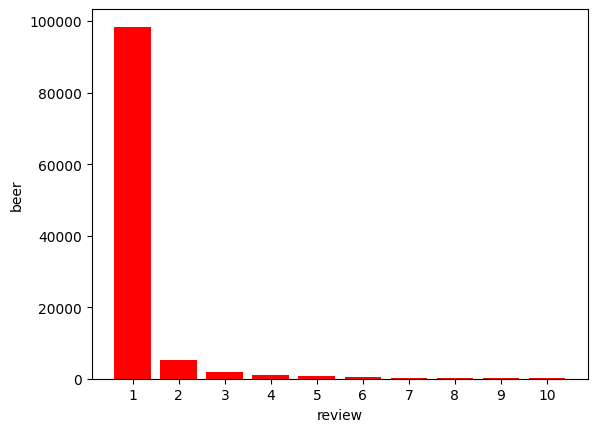

In [33]:
label = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']  # 대충 37개씩 끊김

new = pd.cut(filtered_df['count'], 10, labels=label)
group_counts = new.value_counts()
print(group_counts.values)
# print(type(group_counts.index))

plt.bar(group_counts.index, group_counts.values, color='red')
plt.xlabel('review')
plt.ylabel('beer')
plt.show()

## 이제 대충 봤으니 370개 이상인 데이터만 크롤링 하자

In [39]:
filtered_df = beer_df[beer_df['count'] > 370]
filtered_df = filtered_df.reset_index(drop=True)

In [49]:
# 370개 이상 있는 맥주만 추려서 크롤링 할거임
many_review_beer = list(filtered_df['beer/beerId'])
for i in range(len(many_review_beer)):
    many_review_beer[i] = int(many_review_beer[i])